upload the images files as zip.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving face_images.zip to face_images.zip


In [ ]:
import os
for fname in uploaded.keys():
    print("Uploaded filename:", fname)


Uploaded filename: face_images.zip


In [ ]:
uploaded.keys()  # This will print uploaded filenames


dict_keys(['face_images.zip'])

In [ ]:
import zipfile

zip_path = "/content/face_images.zip"  # Make sure this path is correct
extract_path = "/content/face_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed.")


Extraction completed.


In [ ]:
import os

for folder in os.listdir(extract_path):
    print(folder)


face_images


Train the model with the face images.

In [ ]:
import os
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Upload ZIP (if not already uploaded)
# files.upload()  # Only run if needed

# Step 2: Paths
zip_path = "/content/face_images.zip"
extract_path = "/content/face_dataset"

# Step 3: Remove old folder if exists and extract again
shutil.rmtree(extract_path, ignore_errors=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 4: Define dataset path
data_dir = os.path.join(extract_path, "face_images")  # make sure subfolder exists here

# Step 5: Image Parameters
img_height, img_width = 100, 100
batch_size = 32

# Step 6: Data generators
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 80% train, 20% val
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Step 7: Model
num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Step 8: Compile
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 9: Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 34 images belonging to 5 classes.
Found 7 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step - accuracy: 0.2402 - loss: 1.6339 - val_accuracy: 0.1429 - val_loss: 1.4618
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - accuracy: 0.3303 - loss: 2.1904 - val_accuracy: 0.7143 - val_loss: 1.2614
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.3199 - loss: 1.8561 - val_accuracy: 0.2857 - val_loss: 1.3259
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - accuracy: 0.6471 - loss: 1.2996 - val_accuracy: 0.2857 - val_loss: 1.3877
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step - accuracy: 0.4804 - loss: 1.3176 - val_accuracy: 0.7143 - val_loss: 1.2898
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.6201 - loss: 1.0531 - val_accuracy: 0.5714 - val_loss: 1.3823
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.7206 - loss: 0.8279 - val_accuracy: 0.4286 - val_loss: 1.4845
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 0.8627 - loss: 0.7252 - val_accuracy: 0.2857 - val_loss:

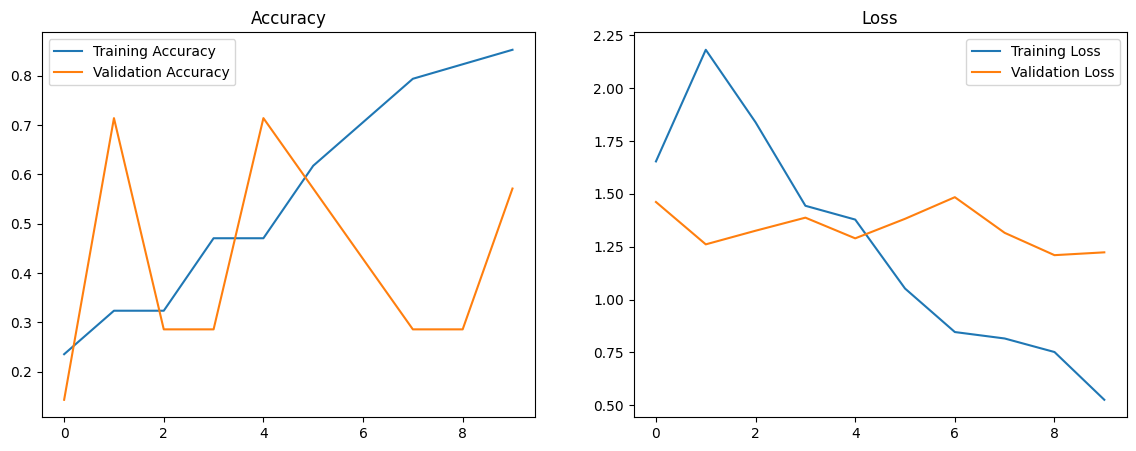

In [ ]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
# Extract final epoch metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 85.29%
Final Validation Accuracy: 57.14%
Final Training Loss: 0.5261
Final Validation Loss: 1.2236


In [ ]:
model.save("face_recognition_model.keras")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

# Upload a test image
uploaded = files.upload()
filename = next(iter(uploaded))
img_path = "/content/" + filename

# Load and preprocess the test image
test_img = image.load_img(img_path, target_size=(img_height, img_width))
test_img_array = image.img_to_array(test_img)
test_img_array = np.expand_dims(test_img_array, axis=0) / 255.0

# Predict the label
pred = model.predict(test_img_array)
predicted_class_index = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

# Path to one image from the predicted class folder
dataset_base_path = train_generator.directory
predicted_class_path = os.path.join(dataset_base_path, predicted_label)
representative_image_path = os.path.join(predicted_class_path, os.listdir(predicted_class_path)[0])

# Load the representative image
rep_img = image.load_img(representative_image_path, target_size=(img_height, img_width))

# Plot test image and predicted representative image side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title("Uploaded Test Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rep_img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')

plt.show()


StopIteration: 